EDA on Telco Customer Churn Dataset

In [5]:
# importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing CSV dataset
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
# checking the dataset size and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from the above information we can see that TotalCharges are coming as object it should come as float type so we have to fix the
columns and change the data type

we can check that error via excel.
by checking excel I found for tenure of Zero months the total charges are showing blank, where it should show 0 instead

In [9]:
# replacing the value in total charges coloumn
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#now we can see the data type is changed to float
# now we will check the null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# check total dataset null value count
df.isnull().sum().sum()

0

no null value is there.

In [15]:
# time to check the duplicate data for customer ID coloumn because it should be unique.
df["customerID"].duplicated().sum()

0

no duplicate data found. we will generate some insights from the data.

In [16]:
# to generate insights
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Observations:
1. A small proportion of customers are senior citizens (16.2%).
2. Tenure varies significantly, with a median of 29 months.
3. Many customers have relatively short tenures (25% ≤ 9 months).
4. Monthly Charges also show significant variation, with a median around $70.
5. The spread in Total Charges is substantial,which makes sense given that it depends on both tenure and Monthly Charges.

now for ease of our analysis I will change seniorcitizen column from 0 , 1 to Yes or no. I built a function for that.

In [18]:
# building a conv() function:
def conv(value):
    if value == 1:
        return "Yes"
    else :
        return "No"

In [46]:
# applying above function on senior citizen columns:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

successfully changed

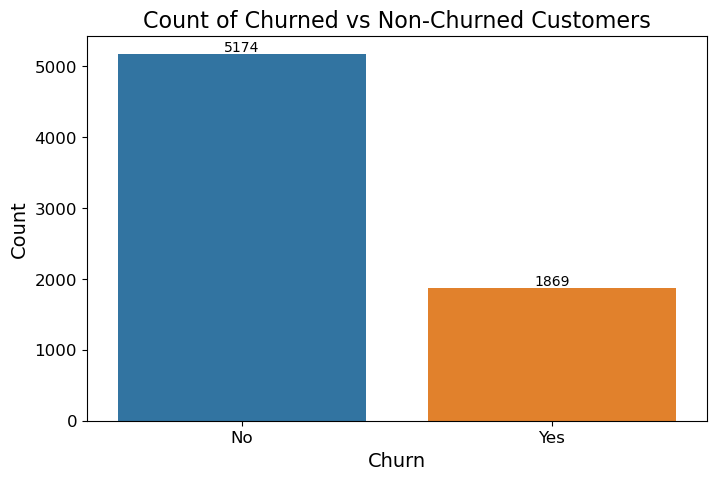

In [36]:
#generating a count plot from the above data set
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Churn')  # Countplot
ax.bar_label(ax.containers[0])
# Customize titles and labels
plt.title('Count of Churned vs Non-Churned Customers', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

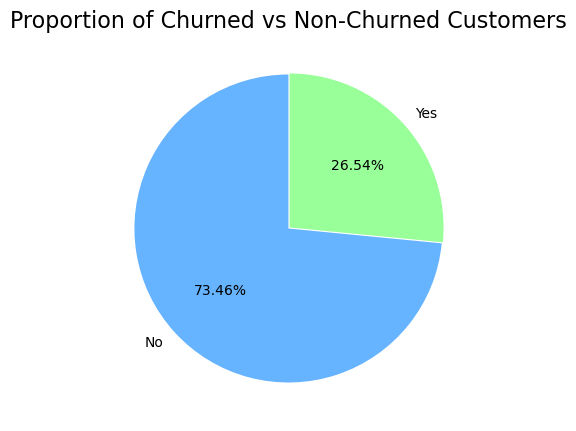

In [34]:
# Calculate counts for each category in 'Churn'
churn_counts = df['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90, explode=[0, 0.01])
plt.title('Proportion of Churned vs Non-Churned Customers', fontsize=16)
plt.show()

Observation:
    Approximately 26.54% of customers have churned, while 73.46% remain active, indicating a significant retention rate.

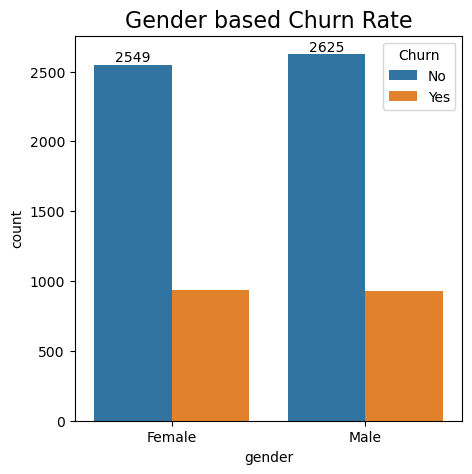

In [40]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="gender",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title('Gender based Churn Rate', fontsize=16)
plt.show()

from the above graph we can say that churn rate is not gender specific.


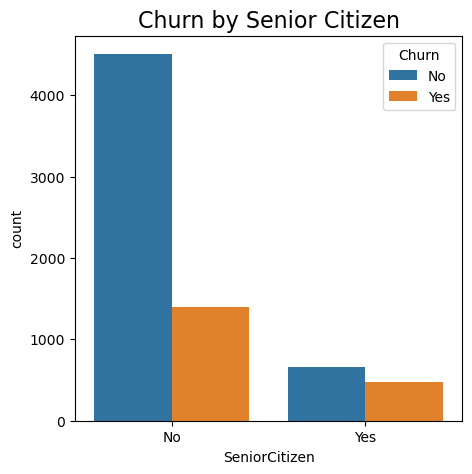

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x="SeniorCitizen",data = df,hue = "Churn")
plt.title('Churn by Senior Citizen', fontsize=16)
plt.show()

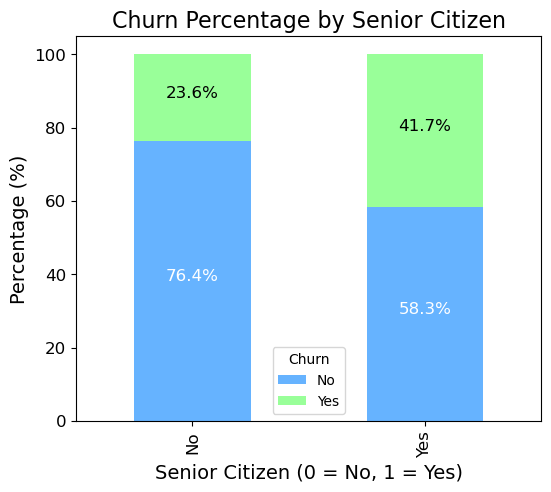

In [49]:
# Calculate the percentage for each group
grouped = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, color=['#66b3ff', '#99ff99'], figsize=(6, 5))

# Add percentages as data labels
for i, bars in enumerate(grouped.values):
    plt.text(i, bars[0]/2, f'{bars[0]:.1f}%', ha='center', color='white', fontsize=12)
    plt.text(i, 100 - bars[1]/2, f'{bars[1]:.1f}%', ha='center', color='black', fontsize=12)

# Customize chart
plt.title('Churn Percentage by Senior Citizen', fontsize=16)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

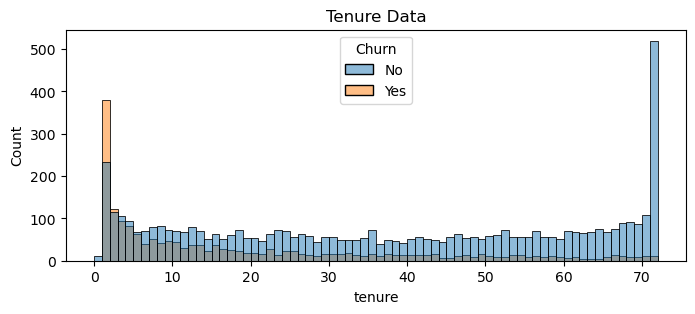

In [62]:
#generate histogram for tenure analysis
plt.figure(figsize=(8,3))
sns.histplot(x="tenure",data = df,bins = 72,hue = "Churn")
plt.title("Tenure Data")
plt.show()

from the above histogram we can estimate that longer tenure customers are staying with the company

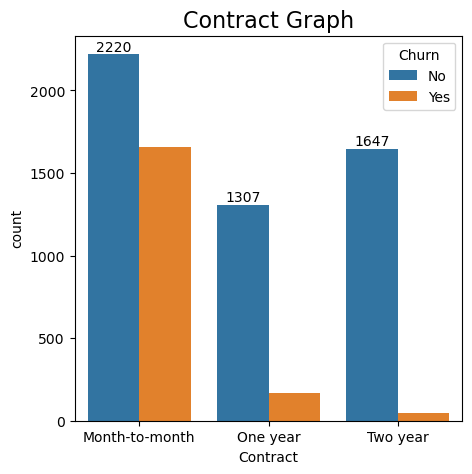

In [64]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Contract",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title('Contract Graph', fontsize=16)
plt.show()

In [65]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

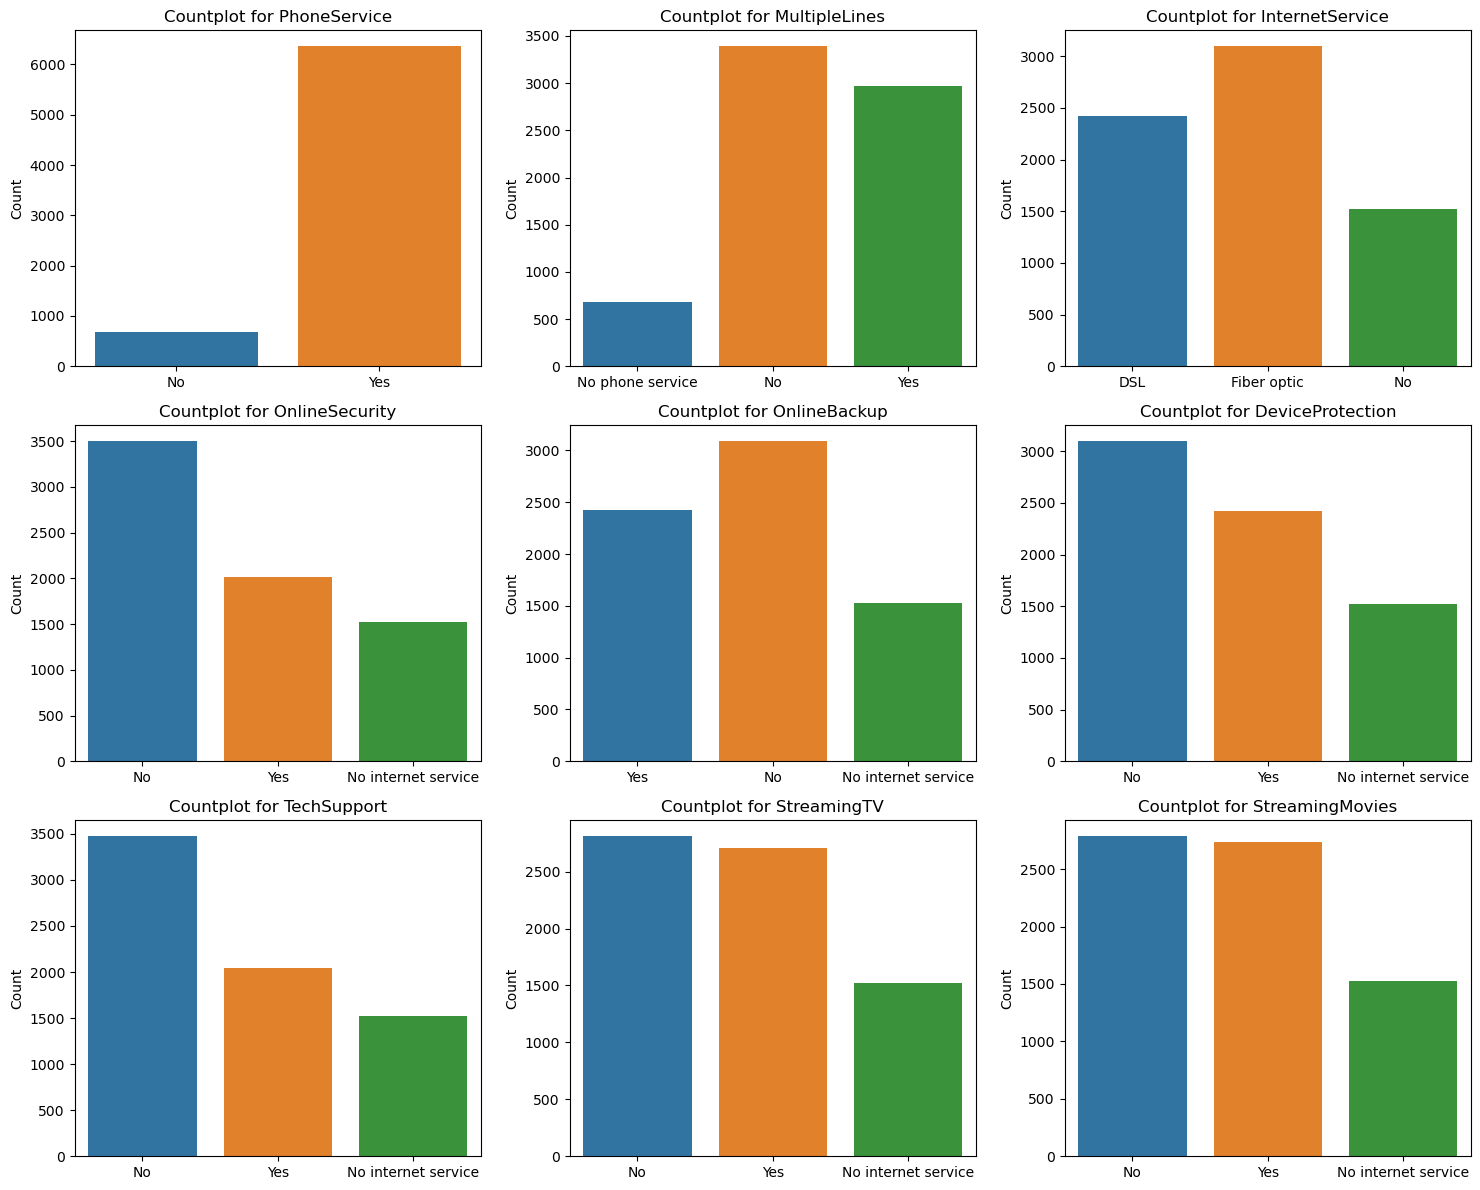

In [68]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed (ceiling division)

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array to loop easily

# Generate countplots for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot for {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused axes
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Executive Insights:
1. Phone Service: The majority of customers have phone service.
2. Internet Service: Most customers use Fiber optic or DSL; a smaller segment has no internet service.
3. Additional Services: Services like Online Security, Tech Support, Device Protection, Streaming TV, and Streaming Movies are underutilized, with a significant portion of customers not opting for these add-ons.
4. Multiple Lines: Many customers with phone services prefer not having multiple lines.

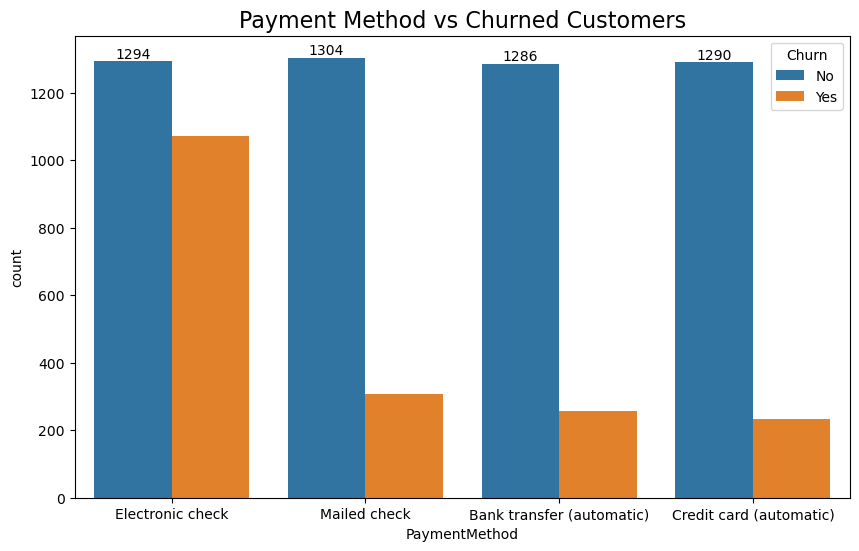

In [76]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="PaymentMethod",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title('Payment Method vs Churned Customers', fontsize=16)
plt.show()

Electronic Check customers are more likely to churn

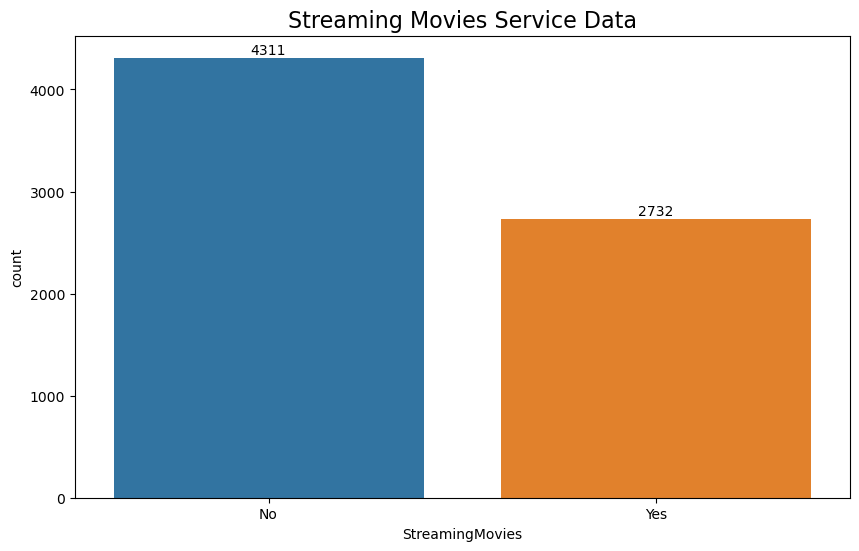

In [86]:
df["StreamingMovies"] = df["StreamingMovies"].replace("No internet service","No")
plt.figure(figsize=(10,6))
ax = sns.countplot(x="StreamingMovies",data = df)
ax.bar_label(ax.containers[0])
plt.title('Streaming Movies Service Data', fontsize=16)
plt.show()

In [ ]:
50 % of the customers are subscribed to streaming movies.